In [1]:
import pandas as pd
from io import StringIO

In [2]:
csv_data = '''A, B, C, D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,,8.0
0.0, 11.0,12.0,'''

In [3]:
df = pd.read_csv(StringIO(csv_data))
'''
This module implements a file-like class, StringIO,
that reads and writes a string buffer (also known as memory files).
See the description of file objects for operations (section File Objects). 
(For standard strings, see str and unicode.)
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
A     3 non-null float64
 B    3 non-null float64
 C    2 non-null float64
 D    2 non-null float64
dtypes: float64(4)
memory usage: 176.0 bytes


In [4]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [5]:
df.isnull().sum()

A     0
 B    0
 C    1
 D    1
dtype: int64

Features <-> Columns<br>
samples <-> Rows

In [6]:
# row
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
# columns
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [8]:
help(df.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) method of pandas.core.frame.DataFrame instance
    Return object with labels on given axis omitted where alternately any
    or all of the data are missing
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, or tuple/list thereof
        Pass tuple or list to drop on multiple axes
    how : {'any', 'all'}
        * any : if any NA values are present, drop that label
        * all : if all values are NA, drop that label
    thresh : int, default None
        int value : require that many non-NA values
    subset : array-like
        Labels along other axis to consider, e.g. if you are dropping rows
        these would be a list of columns to include
    inplace : boolean, default False
        If True, do operation inplace and return None.
    
    Returns
    -------
    dropped : DataFrame
    
    Examples
    --------
    >>> df = pd.DataFr

# 填充缺失值


In [9]:
from sklearn.preprocessing import Imputer

In [10]:
# NaN not NAN
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
'''
strategy : string, optional (default=”mean”)

The imputation strategy.

If “mean”, then replace missing values using the mean along the axis.
If “median”, then replace missing values using the median along the axis.
If “most_frequent”, then replace missing using the most frequent value along the axis.

most_frequent is useful for imputing categorical feature values.
'''
imr.fit(df)
imputed_data = imr.transform(df.values)
# The fit method is used to learn the parameters from the trainning data, and the transform method uses those
# parameters to transform the data.
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [ 0. , 11. , 12. ,  6. ]])

In [11]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


# 类别数据

## 有序类别

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])
df.columns = ['color','size','price','classlabel']
'''
nominal feature : color
ordinal feature : size
numerial feature : price
'''
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [14]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1
}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [15]:
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [16]:
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## 无序分类

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [19]:
class_le.inverse_transform(y)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2', 'class1'], dtype=object)

In [20]:
class_le.classes_

array(['class1', 'class2'], dtype=object)

In [21]:
X = df[['color','size','price']].values
color_le = LabelEncoder()
print(X)
X[:, 0] = color_le.fit_transform(X[:,0])
X

[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]


array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [22]:
print(df.info())
pd.get_dummies(df)
# The get_dummies method will only convert string columns and leave all other columns unchanged.
# in df, color, size and class are string type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
color         3 non-null object
size          3 non-null int64
price         3 non-null float64
classlabel    3 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 176.0+ bytes
None


,size,price,color_blue,color_green,color_red,classlabel_class1,classlabel_class2
0,1,10.1,0,1,0,1,0
1,2,13.5,0,0,1,0,1
2,3,15.3,1,0,0,1,0


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
# 
print(X)
ohe = OneHotEncoder(categorical_features=[0])
#  columns position - categorical_features
ohe.fit_transform(X).toarray()
# toarray from sparse matrices to regular Numpy array.
# sparse=False

[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]]


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [25]:
# pd.get_dummies()

# Wine

In [26]:
df_wine = pd.read_csv('wine.data',header=None)

In [27]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [28]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [31]:
# Instead of discarding the allocated test data after model training and evaluation,
# it is a good idea to retrain a classifier on the entire dataset for optimal preformance.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
stdsc = StandardScaler()

In [36]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
lr = LogisticRegression(penalty='l1',C=0.1)
lr.fit(X_train_std,y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:',lr.score(X_test_std,y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9814814814814815


In [39]:
lr.intercept_

array([-0.38381023, -0.15807848, -0.70038708])

In [40]:
lr.coef_

array([[ 0.28017961,  0.        ,  0.        , -0.02797336,  0.        ,
         0.        ,  0.7100418 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23626574],
       [-0.64402412, -0.0687361 , -0.05720773,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92674248,
         0.06018097,  0.        , -0.37102207],
       [ 0.        ,  0.06149686,  0.        ,  0.        ,  0.        ,
         0.        , -0.63695261,  0.        ,  0.        ,  0.49854515,
        -0.35796013, -0.57028808,  0.        ]])

In [41]:
import matplotlib.pyplot as plt

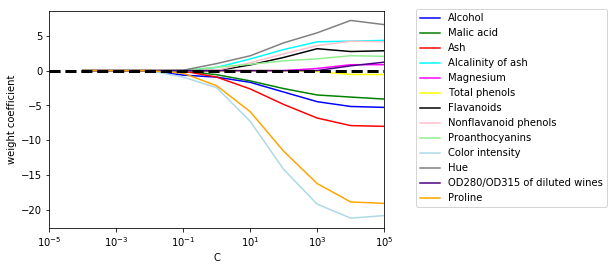

In [42]:
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)
colors =['blue','green','red','cyan',
         'magenta','yellow','black',
         'pink','lightgreen','lightblue',
         'gray','indigo','orange']
weights, params = [],[]
for c in range(-4,6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [43]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
class SBS():
    def __init__(self, estimator, k_features, 
                 scoring=accuracy_score, 
                 test_size=0.25, 
                 random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, 
                             random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
            
        while dim > self.k_features:
            scores = []
            subsets = []
             
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
                
            dim -= 1
                
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
            
        return self
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, 
                    X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
           
        

In [45]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [46]:
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

In [47]:
sbs.scores_

[0.9354838709677419,
 0.967741935483871,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9354838709677419,
 0.967741935483871,
 0.8709677419354839,
 0.8387096774193549]

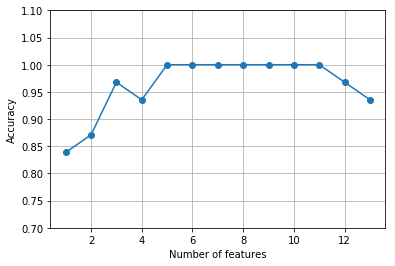

In [48]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [49]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [50]:
knn.fit(X_train_std, y_train)
print('Training accuracy:',knn.score(X_train_std,y_train))
print('Test accuracy:',knn.score(X_test_std,y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444


In [51]:
knn.fit(X_train_std[:,k5],y_train)
print('Training accuracy:',knn.score(X_train_std[:,k5],y_train))
print('Test accuracy:',knn.score(X_test_std[:,k5],y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


# 随机森林看特征重要度

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, 
                                random_state=0, 
                                n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[f],importances[indices[f]]))


 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


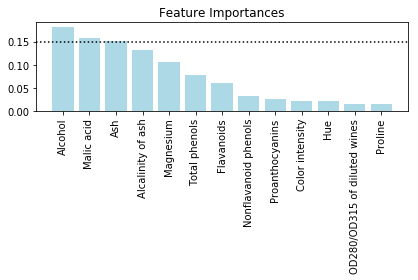

In [54]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue',
        align='center')
plt.axhline(y=0.15,ls='dotted',color='k')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()